In [303]:
# Let's set everything up here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [269]:
# Generate mappings from stops to stop codes, stop codes to coords on the map
## STOP DATA ## 
stops = {
    "AWF": (410, 180),
    "DVS": (435, 206),
    "PTR": (461.5, 232.5),
    "HRV": (488, 260),
    "CNT": (517, 290),
    "MIT": (549, 321.5),
    "MGH": (607.7, 381),
    "PRK": (666.4, 439),
    "DTX": (726.5, 500),
    "SOU": (788, 559.5),
    "BWY": (848, 620.5),
    "ADR": (876.6, 649),
    "JFK": (908, 681.6),

    "NQY": (968.6, 740.4),
    "WOL": (999.5, 772),
    "QCT": (1028, 802),
    "QAD": (1058.2, 832.3),
    "BTR": (1069, 899.5),

    "SAV": (900, 748),
    "FIE": (868, 779.8),
    "SHW": (837, 812),
    "ASH": (809, 837),
    "MAT": (667, 980)
}

# For finding in the free text
keywords = {
    "Alewife": "AWF",
    "Davis": "DVS",
    "Porter": "PTR",
    "Harvard": "HRV",
    "Central": "CNT",
    "Kendall": "MIT",
    "Charles": "MGH",
    "Park": "PRK",
    "Downtown": "DTX",
    "South": "SOU",
    "Broadway": "BWY",
    "Andrew": "ADR",
    "JFK": "JFK",
    "North Quincy": "NQY",
    "Woll": "WOL",
    "Center": "QCT",
    "Adams": "QAD",
    "Brain": "BTR",
    "Savin": "SAV",
    "Field": "FIE",
    "Shawmut": "SHW",
    "Ashmont": "ASH",
    "Braintree": "BTR",
    "Mattapan": "MAT"
}
kw_near = {"near %s"%name:stop for name,stop in keywords.items()}
kw_at = {"at %s"%name:stop for name,stop in keywords.items()} 
keywords = {}
keywords.update(kw_near)
keywords.update(kw_at)

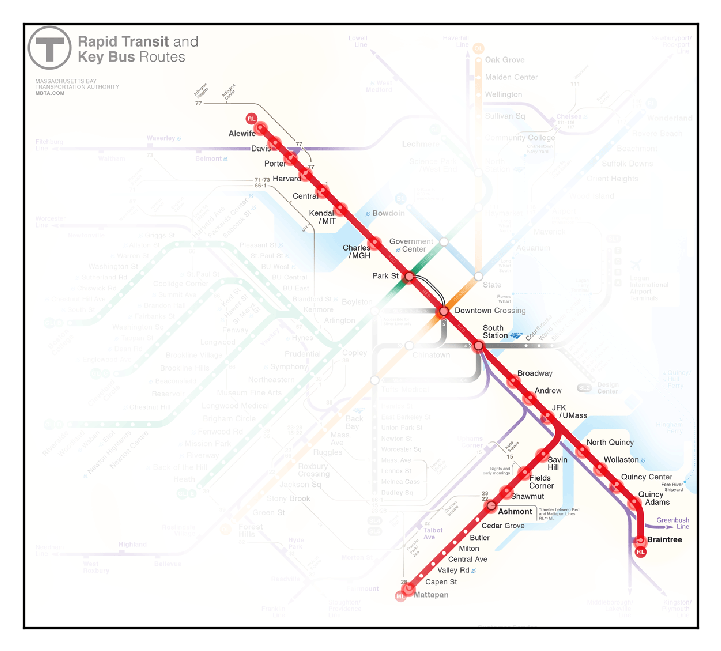

In [270]:
# Here's a brief look at the map
im = plt.imread("map.png")
plt.imshow(im)
plt.scatter(*zip(*stops.values()), alpha=0.4, s=20, c='r')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

In [271]:
# Read and clean alert data
df = pd.read_csv("all-alerts-clean.csv")

# FILTER DATA #
alerts = df[['Alert ID', 'Version No.', 'Effect', 'Affecting', 'Cause', 'Severity', 'Effect Start', 'Effect End', 'Header']]

# No station-caused issues
redLine = alerts[ 
     (alerts['Effect']!= 'Policy Change') & 
     (alerts['Effect'] != 'Station Closure') & 
     (alerts['Effect'] != 'Station Issue') &
     (alerts['Affecting'].str.contains('Red'))
] 

# Train and track problems only
redLine = redLine [ (redLine['Cause'] != 'construction') &
                    (redLine['Cause'] != 'medical emergency') &
                    (redLine['Cause'] != 'police action')
                  ]

# Lowercase everything for string matching
redLine['NormalizedAlert'] = redLine.Header.str.lower()

In [272]:
redLine

,Alert ID,Version No.,Effect,Affecting,Cause,Severity,Effect Start,Effect End,Header,NormalizedAlert
73,109879,1,Delay,Red Line; Southbound,track problem,Minor,2016-01-03T16:25:06.456,later today,Red Line experiencing minor southbound delays ...,red line experiencing minor southbound delays ...
75,109891,1,Delay,"Red Line; Southbound; Alewife, Davis - Inbound...",NaN,Moderate,2016-01-03T18:55:47.164,later today,Red Line Braintree branch experiencing moderat...,red line braintree branch experiencing moderat...
98,109937,1,Delay,Red Line; Northbound,signal problem,Minor,2016-01-04T07:51:21.759,later today,Red Line experiencing minor northbound delays ...,red line experiencing minor northbound delays ...
116,109962,1,Delay,"Red Line; Northbound; Braintree, Quincy Adams ...",NaN,Minor,2016-01-04T11:00:29.826,later today,Red Line (Braintree branch) experiencing minor...,red line (braintree branch) experiencing minor...
122,109973,1,Delay,Red Line,disabled train,Moderate,2016-01-04T14:45:31.846,later today,Red Line experiencing moderate delays due to a...,red line experiencing moderate delays due to a...
126,109990,1,Delay,Red Line; Southbound,NaN,Moderate,2016-01-04T17:07:11.955,later today,Red Line experiencing moderate southbound delays,red line experiencing moderate southbound delays
127,109990,2,Delay,"Red Line; Northbound; Ashmont - Inbound, Shawm...",disabled train,Moderate,2016-01-04T17:07:11.955,later today,Red Line (Ashmont branch) experiencing moderat...,red line (ashmont branch) experiencing moderat...
138,110034,1,Delay,"Red Line; Northbound; Quincy Center - Inbound,...",disabled train,Minor,2016-01-05T06:08:24.693,later today,Red Line experiencing minor northbound delays ...,red line experiencing minor northbound delays ...
139,110034,2,Delay,Red Line; Northbound,disabled train,Minor,2016-01-05T06:08:24.693,later today,Red Line experiencing minor northbound delays ...,red line experiencing minor northbound delays ...
144,110069,1,Shuttle,"Red Line; JFK/Umass, Savin Hill, Fields Corner...",track problem,Severe,2016-01-05T08:08:17.689,later today,Shuttle buses replacing Red Line southbound se...,shuttle buses replacing red line southbound se...


In [273]:
## COUNTS ## 
for stop in keywords.values():
    redLine[stop] = False

for kw, stop in keywords.items():
    kw = kw.lower()
    redLine[stop] += redLine['NormalizedAlert'].str.contains(kw)
    
# For counting purposes we can use the first revision of each alert
redLineInitAlerts = redLine[ redLine['Version No.'] == 1 ] 


In [325]:
# Sizing the area of the circles
# Initial area of 3 unit circles and then increase by .5 unit for each add'l alert
weight_delta = 0.5 * np.pi
weight_init = 3 * np.pi

def plot(df):
    # Generate circles for plotting "heatmap"
    weights = { k:0 for k in stops.keys() }

    redLineCounts = df[ stops.keys() ].sum()

    for stop, n in redLineCounts.iteritems():
        weight = (weight_init) + (weight_delta * (n-1))
        weights[stop] = weight

    ## PLOT ##
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    plt.imshow(im, interpolation="bicubic")

    for stopcode, size in weights.items():
        nAlerts = redLineCounts[stopcode]
        x, y = stops[stopcode]
        if nAlerts>0:
            plt.plot(x, y, 'ro', alpha=0.2, markersize=size*0.5)

        plt.text(x, y, nAlerts, fontdict={"size": 2.5, "weight": "bold"},
                 bbox=dict(facecolor='white', edgecolor='red', linewidth=0.1, joinstyle='round', pad=0.3))
    plt.show()

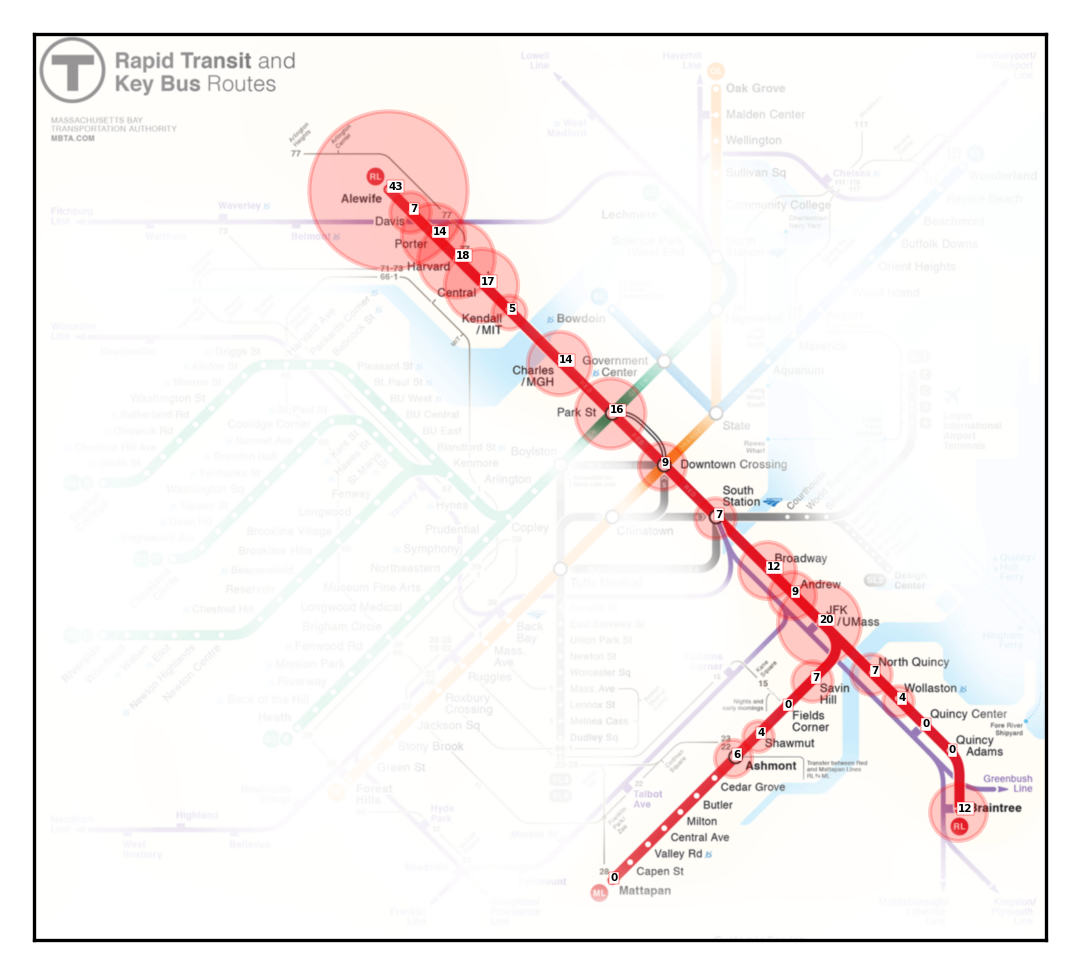

In [318]:
plot(redLineInitAlerts)

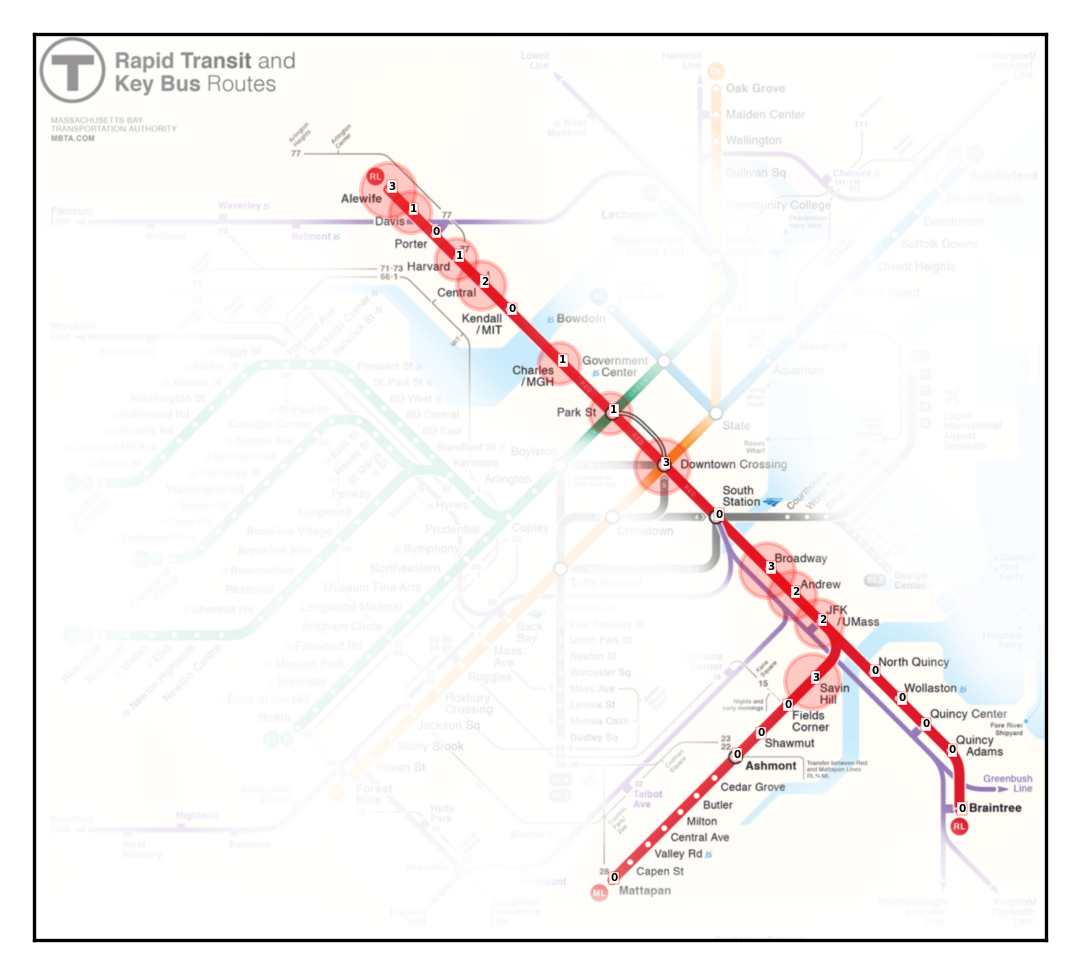

In [328]:
weight_delta = np.pi
trackIssues = redLineInitAlerts[ 
    (redLineInitAlerts.Cause == "track problem") |
    (redLineInitAlerts.Cause == "switch problem")
]
plot(trackIssues)

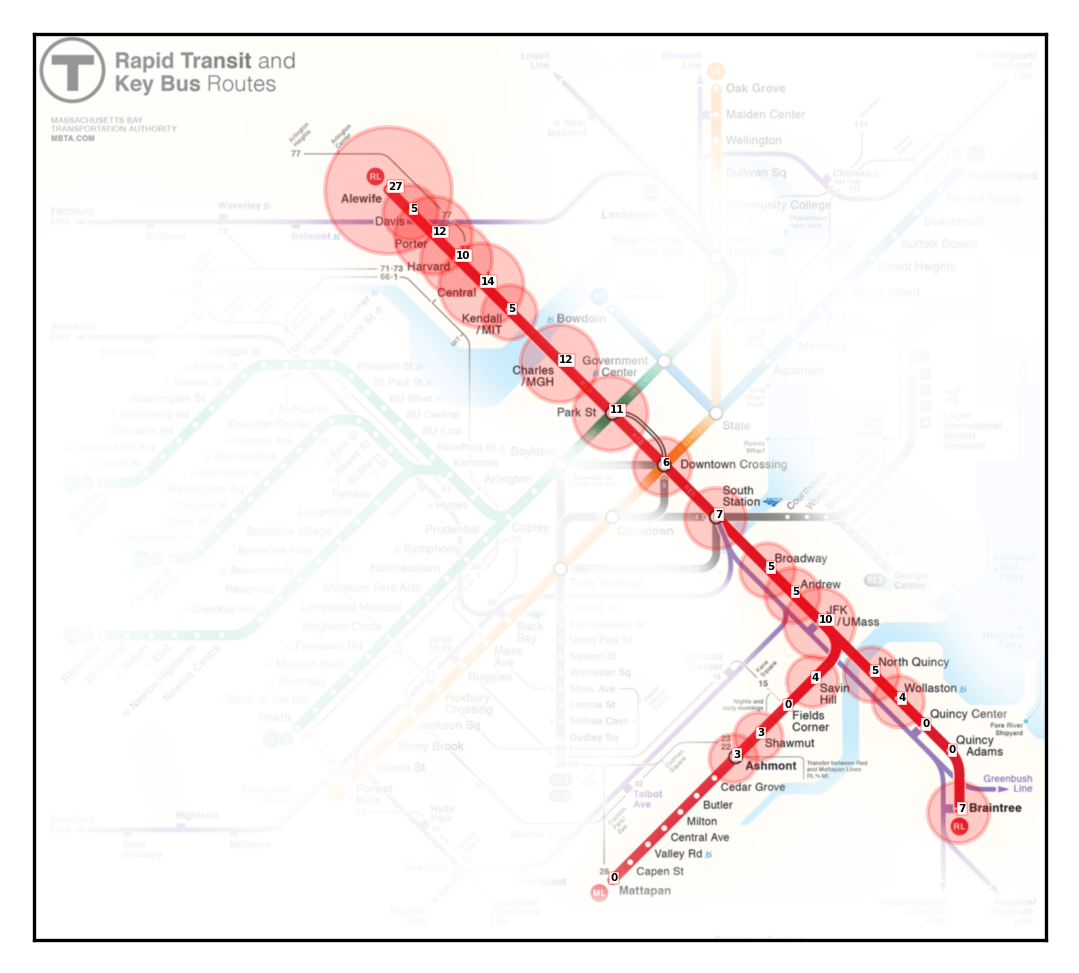

In [330]:
weight_delta = 0.5*np.pi
trainIssues = redLineInitAlerts[ 
    (redLineInitAlerts.Cause == "disabled train") 
]
plot(trainIssues)

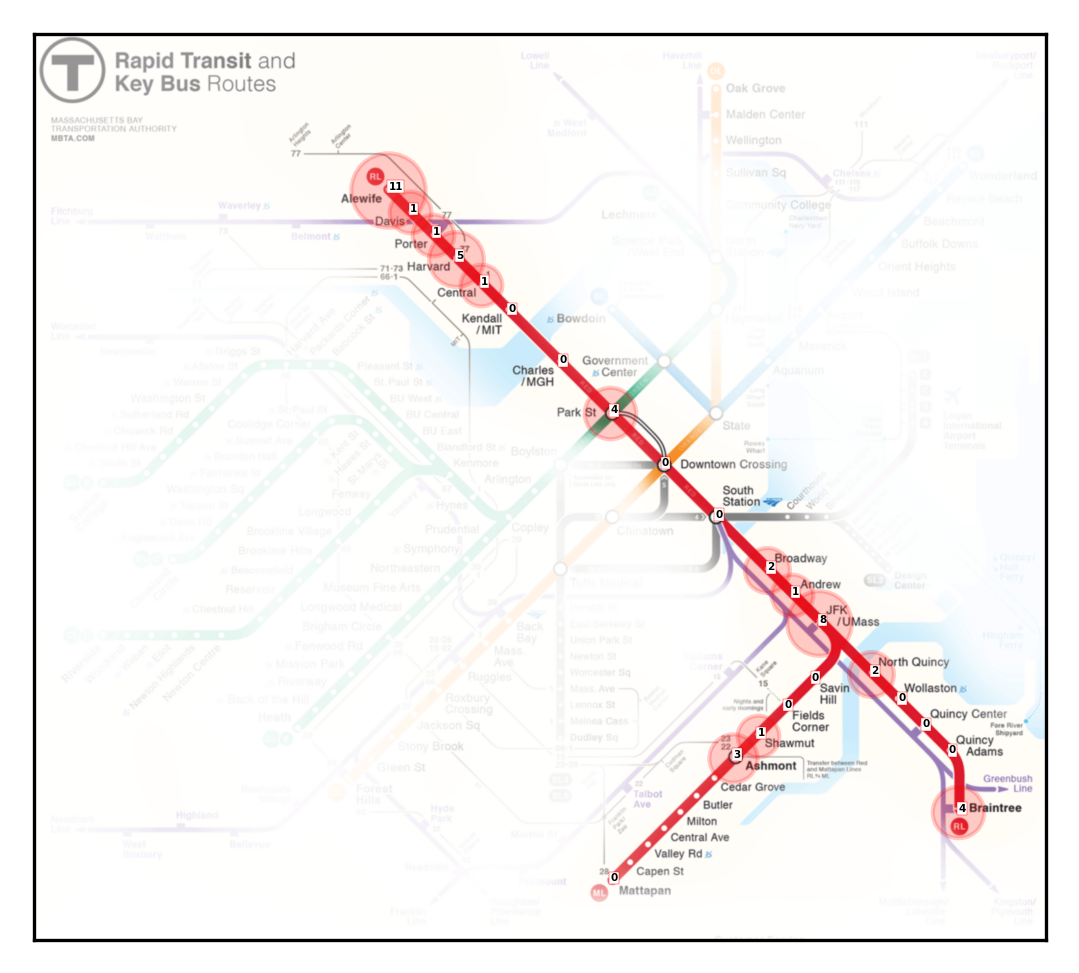

In [331]:
signalIssues = redLineInitAlerts[ 
    (redLineInitAlerts.Cause == "signal problem") 
]
plot(signalIssues)